In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import regexp_tokenize
from nltk.corpus import stopwords
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_curve, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

                                              Fake data

In [2]:
fake_data=pd.read_excel('C:\\Users\\Dell\\Desktop\\Fake.xlsx')
fake_data.head()

,title,text,subject,date,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171
0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Trump Is So Obsessed He Even Has Obamaâ€™s Na...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
fake_data.shape

(23502, 172)

In [4]:
fake_data.isnull().sum()

title               0
text                0
subject            21
date               21
Unnamed: 4      23481
                ...  
Unnamed: 167    23500
Unnamed: 168    23500
Unnamed: 169    23500
Unnamed: 170    23500
Unnamed: 171    23500
Length: 172, dtype: int64

From Unnamed4,Unnamed5,...,Unnamed171 columns have higher number of missimg values, so we select first four columns from the dataset.

In [5]:
data=fake_data.iloc[:,0:4]
data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obamaâ€™s Na...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


Fill the missing values by fillna() method

In [6]:
data['subject']=data['subject'].fillna(data['subject'].mode()[0])
data['date']=data['date'].fillna(data['date'].mode()[0])

Insert one label column which take value zero as a fake news

In [7]:
data=data.assign(label=0)
data.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obamaâ€™s Na...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


                                            true dataset

In [8]:
true_data=pd.read_excel('C:\\Users\\Dell\\Desktop\\True.xlsx')
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [9]:
true_data.shape

(21417, 4)

In [10]:
true_data.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

Insert one label column which take value one as a true news

In [11]:
true_data=true_data.assign(label=1)
true_data.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


# DataSet

In [12]:
data=data.append(true_data,ignore_index=True)

data.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obamaâ€™s Na...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [13]:
data.shape

(44919, 5)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44919 entries, 0 to 44918
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44919 non-null  object
 1   text     44919 non-null  object
 2   subject  44919 non-null  object
 3   date     44919 non-null  object
 4   label    44919 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


# Data Preprocessing

In [15]:
# lower case

data['title']=data['title'].str.lower()
data['text']=data['text'].str.lower()
data['subject']=data['subject'].str.lower()
data['date']=data['date'].str.lower()

In [16]:
# Remove numbers

data['title']=data['title'].replace(to_replace="[0-9]",value='', regex=True)
data['text']=data['text'].replace(to_replace="[0-9]",value='', regex=True)
data['subject']=data['subject'].replace(to_replace="[0-9]",value='', regex=True)
data['date']=data['date'].replace(to_replace="[0-9]",value='', regex=True)

In [17]:
# Remove symbols

data['title']=data['title'].replace(to_replace='[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]',value='', regex=True)
data['text']=data['text'].replace(to_replace='[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]',value='', regex=True)
data['subject']=data['subject'].replace(to_replace='[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]',value='', regex=True)
data['date']=data['date'].replace(to_replace='[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]',value='', regex=True)

In [18]:
# Remove stopwords

stop= stopwords.words('english')

data['title'] = data['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data['text'] = data['text'].apply(lambda y: ' '.join([word for word in y.split() if word not in (stop)]))
data['subject'] = data['subject'].apply(lambda z: ' '.join([word for word in z.split() if word not in (stop)]))

In [ ]:
data.head()

# Data Visualization

In [19]:
data['subject'].value_counts()

politicsnews                                                                                                                                                                                                                  11272
worldnews                                                                                                                                                                                                                     10145
news                                                                                                                                                                                                                           9071
politics                                                                                                                                                                                                                       6838
leftnews                                                                                

In [20]:
data['subject']=data['subject'].replace(['news','politics'],['worldnews','politicsnews'])

worldnews                                                                                                                                                                                                                     19216
politicsnews                                                                                                                                                                                                                  18110
leftnews                                                                                                                                                                                                                       4457
government news                                                                                                                                                                                                                1570
usnews                                                                                  

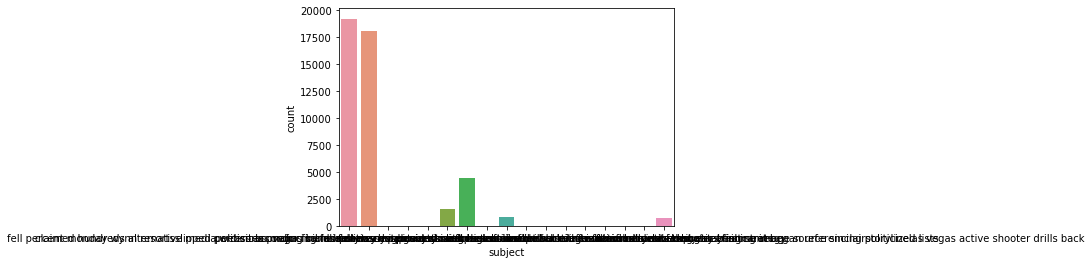

In [21]:
ax= sns.countplot(x='subject',data=data)
print(data['subject'].value_counts())

0    23502
1    21417
Name: label, dtype: int64


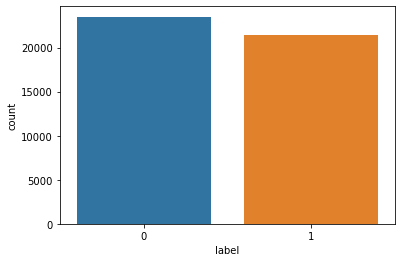

In [22]:
ax= sns.countplot(x='label',data=data)
print(data['label'].value_counts())

                                          Encoding Technique

In [23]:
enc=OrdinalEncoder()

for i in data.columns:
    if data[i].dtypes=="object":
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

# Data Analysis

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44919 entries, 0 to 44918
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    44919 non-null  float64
 1   text     44919 non-null  float64
 2   subject  44919 non-null  float64
 3   date     44884 non-null  float64
 4   label    44919 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 1.7 MB


In [25]:
data.describe()

,title,text,subject,date,label
count,44919.000000,44919.000000,44919.000000,44884.000000,44919.000000
mean,19134.081747,18878.172511,13.067254,33.122159,0.476792
std,11268.681093,11199.660244,3.056381,13.014366,0.499467
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9366.500000,9337.500000,12.000000,19.000000,0.000000
50%,18920.000000,18873.000000,12.000000,36.000000,0.000000
75%,28846.500000,28310.500000,16.000000,44.000000,1.000000
max,38687.000000,38647.000000,16.000000,51.000000,1.000000


                                                  Correlation

In [26]:
data.corr()

,title,text,subject,date,label
title,1.000000,0.121471,0.016525,-0.005672,0.035328
text,0.121471,1.000000,-0.107723,-0.024236,0.198020
subject,0.016525,-0.107723,1.000000,0.156377,0.258460
date,-0.005672,-0.024236,0.156377,1.000000,0.225431
label,0.035328,0.198020,0.258460,0.225431,1.000000


<AxesSubplot:>

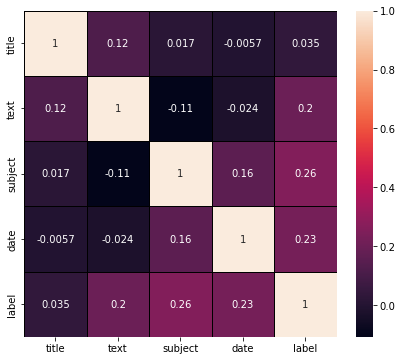

In [32]:
plt.figure(figsize=(7,6))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,linecolor='black')

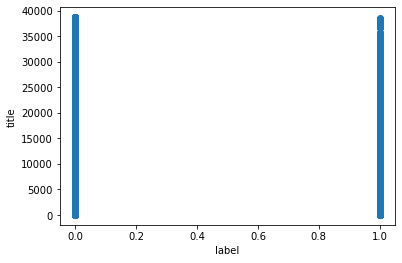

In [33]:
plt.scatter(data['label'],data['title'])
plt.xlabel('label')
plt.ylabel('title')
plt.show()

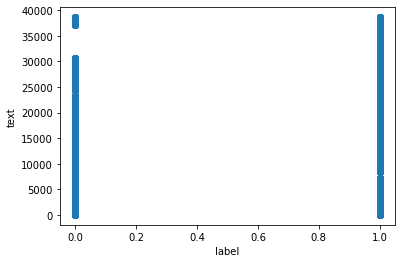

In [34]:
plt.scatter(data['label'],data['text'])
plt.xlabel('label')
plt.ylabel('text')
plt.show()

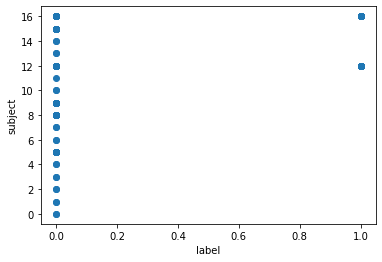

In [35]:
plt.scatter(data['label'],data['subject'])
plt.xlabel('label')
plt.ylabel('subject')
plt.show()

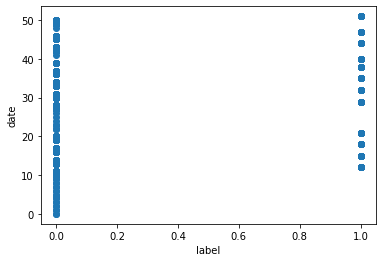

In [36]:
plt.scatter(data['label'],data['date'])
plt.xlabel('label')
plt.ylabel('date')
plt.show()

# Data Modeling

In [44]:
x=data.drop(['label'],axis=1)
y=data['label']

                                            Logistic Regression

In [45]:
lr=LogisticRegression()

In [46]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test,pred_test)*100)
    print('\n')

random state 0
Training accuracy score: 56.28597780110041
Testing accuracy score: 56.00326506381715


random state 1
Training accuracy score: 56.30824030785867
Testing accuracy score: 55.6099732858415


random state 2
Training accuracy score: 56.09833667270935
Testing accuracy score: 56.0106856634016


random state 3
Training accuracy score: 56.333683172725245
Testing accuracy score: 56.15167705550609


random state 4
Training accuracy score: 56.20646884839233
Testing accuracy score: 56.15167705550609


random state 5
Training accuracy score: 56.41955284164997
Testing accuracy score: 56.12941525675274


random state 6
Training accuracy score: 55.92341697675158
Testing accuracy score: 56.86405461561294


random state 7
Training accuracy score: 56.298699233533696
Testing accuracy score: 56.1071534579994


random state 8
Training accuracy score: 55.4972489902363
Testing accuracy score: 56.44850103888395


random state 9
Training accuracy score: 55.87571160512673
Testing accuracy score: 56

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.30,random_state=46)

In [48]:
lr.fit(x_train,y_train)
y_pred1 = lr.predict(x_test)
accuracy = accuracy_score(y_test,y_pred1)*100
print("accuracy score:",accuracy)

accuracy score: 56.50044523597507


In [49]:
cm= confusion_matrix(y_test,y_pred1)
print(cm)

[[3600 3339]
 [2523 4014]]


In [50]:
clr=classification_report(y_test,y_pred1)
print(clr)

              precision    recall  f1-score   support

           0       0.59      0.52      0.55      6939
           1       0.55      0.61      0.58      6537

    accuracy                           0.57     13476
   macro avg       0.57      0.57      0.56     13476
weighted avg       0.57      0.57      0.56     13476



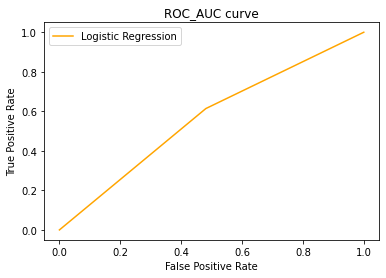

AUC_score 56.64249417711452


In [51]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred1)

plt.plot(fpr,tpr,color='orange',label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC curve')
plt.legend()                                                                                 
plt.show()

auc_score = roc_auc_score(y_test,y_pred1)*100
print("AUC_score",auc_score)

                                            K Neighbors Classifier

In [52]:
knn= KNeighborsClassifier()

In [53]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = i)
    knn.fit(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test,pred_test)*100)
    print('\n')

random state 0
Training accuracy score: 91.35260630346977
Testing accuracy score: 87.16978331849214


random state 1
Training accuracy score: 91.00276691155425
Testing accuracy score: 87.23656871475215


random state 2
Training accuracy score: 91.42893489806953
Testing accuracy score: 86.9100623330365


random state 3
Training accuracy score: 91.483000985911
Testing accuracy score: 87.05105372514099


random state 4
Training accuracy score: 91.39713131698629
Testing accuracy score: 87.23656871475215


random state 5
Training accuracy score: 91.07273478993734
Testing accuracy score: 87.2291481151677


random state 6
Training accuracy score: 91.34624558725312
Testing accuracy score: 87.09557732264767


random state 7
Training accuracy score: 91.23493305346182
Testing accuracy score: 87.26625111308994


random state 8
Training accuracy score: 91.10453837102057
Testing accuracy score: 86.99168892846542


random state 9
Training accuracy score: 91.13952231021213
Testing accuracy score: 87.2

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=68) 

In [55]:
knn.fit(x_train,y_train)
y_pred2 = knn.predict(x_test)
accuracy = accuracy_score(y_test,y_pred2)*100
print("accuracy score:",accuracy)

accuracy score: 87.76343128524785


In [56]:
cm= confusion_matrix(y_test,y_pred2)
print(cm)

[[6360  670]
 [ 979 5467]]


In [57]:
clr=classification_report(y_test,y_pred2)
print(clr)

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      7030
           1       0.89      0.85      0.87      6446

    accuracy                           0.88     13476
   macro avg       0.88      0.88      0.88     13476
weighted avg       0.88      0.88      0.88     13476



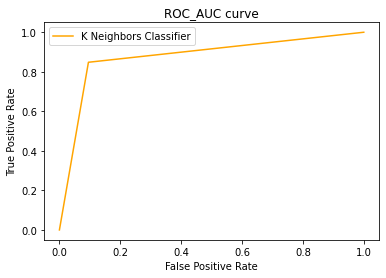

AUC_score 87.64085173731301


In [58]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred2)

plt.plot(fpr,tpr,color='orange',label='K Neighbors Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC curve')
plt.legend()                                                                                 
plt.show()

auc_score = roc_auc_score(y_test,y_pred2)*100
print("AUC_score",auc_score)

                                          Random Forest Classifier

In [59]:
rfc=RandomForestClassifier()

In [60]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = i)
    rfc.fit(x_train,y_train)
    pred_train=rfc.predict(x_train)
    pred_test=rfc.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test,pred_test)*100)
    print('\n')

random state 0
Training accuracy score: 100.0
Testing accuracy score: 99.52508162659542


random state 1
Training accuracy score: 100.0
Testing accuracy score: 99.4731374295043


random state 2
Training accuracy score: 100.0
Testing accuracy score: 99.33956663698427


random state 3
Training accuracy score: 100.0
Testing accuracy score: 99.4731374295043


random state 4
Training accuracy score: 100.0
Testing accuracy score: 99.39893143365984


random state 5
Training accuracy score: 100.0
Testing accuracy score: 99.54734342534877


random state 6
Training accuracy score: 100.0
Testing accuracy score: 99.45087563075097


random state 7
Training accuracy score: 100.0
Testing accuracy score: 99.42861383199762


random state 8
Training accuracy score: 100.0
Testing accuracy score: 99.4582962303354


random state 9
Training accuracy score: 100.0
Testing accuracy score: 99.45087563075097


random state 10
Training accuracy score: 99.99681964189168
Testing accuracy score: 99.42119323241317




In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.30,random_state=93)

In [62]:
rfc.fit(x_train,y_train)
y_pred3 = rfc.predict(x_test)
accuracy = accuracy_score(y_test,y_pred3)*100
print("accuracy score:",accuracy)

accuracy score: 99.53250222617987


In [63]:
cm= confusion_matrix(y_test,y_pred3)
print(cm)

[[7058   25]
 [  38 6355]]


In [64]:
clr=classification_report(y_test,y_pred3)
print(clr)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7083
           1       1.00      0.99      1.00      6393

    accuracy                           1.00     13476
   macro avg       1.00      1.00      1.00     13476
weighted avg       1.00      1.00      1.00     13476



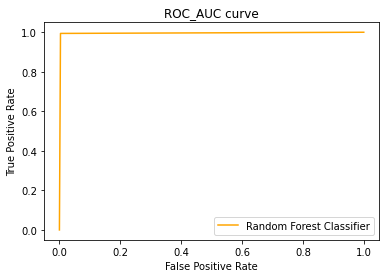

AUC_score 99.52632104430718


In [65]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred3)

plt.plot(fpr,tpr,color='orange',label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC curve')
plt.legend()                                                                                 
plt.show()

auc_score = roc_auc_score(y_test,y_pred3)*100
print("AUC_score",auc_score)

                                             Decision Tree Classifier

In [66]:
clf=DecisionTreeClassifier()

In [67]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = i)
    clf.fit(x_train,y_train)
    pred_train=clf.predict(x_train)
    pred_test=clf.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test,pred_test)*100)
    print('\n')

random state 0
Training accuracy score: 100.0
Testing accuracy score: 99.7922232116355


random state 1
Training accuracy score: 100.0
Testing accuracy score: 99.79964381121995


random state 2
Training accuracy score: 100.0
Testing accuracy score: 99.79964381121995


random state 3
Training accuracy score: 100.0
Testing accuracy score: 99.84416740872662


random state 4
Training accuracy score: 100.0
Testing accuracy score: 99.82932620955773


random state 5
Training accuracy score: 100.0
Testing accuracy score: 99.82190560997329


random state 6
Training accuracy score: 100.0
Testing accuracy score: 99.80706441080439


random state 7
Training accuracy score: 100.0
Testing accuracy score: 99.76996141288215


random state 8
Training accuracy score: 100.0
Testing accuracy score: 99.82932620955773


random state 9
Training accuracy score: 100.0
Testing accuracy score: 99.82932620955773


random state 10
Training accuracy score: 100.0
Testing accuracy score: 99.82932620955773


random sta

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.30,random_state=40)

In [69]:
clf.fit(x_train,y_train)
y_pred4 = clf.predict(x_test)
accuracy = accuracy_score(y_test,y_pred4)*100
print("accuracy score:",accuracy)

accuracy score: 99.88127040664885


In [70]:
cm= confusion_matrix(y_test,y_pred4)
print(cm)

[[7006   12]
 [   4 6454]]


In [71]:
clr=classification_report(y_test,y_pred4)
print(clr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7018
           1       1.00      1.00      1.00      6458

    accuracy                           1.00     13476
   macro avg       1.00      1.00      1.00     13476
weighted avg       1.00      1.00      1.00     13476



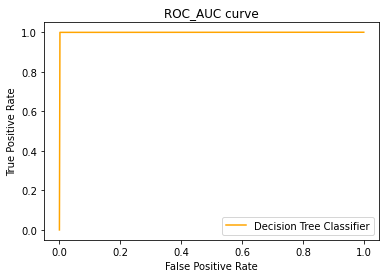

AUC_score 99.88353621678574


In [72]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred4)

plt.plot(fpr,tpr,color='orange',label='Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC curve')
plt.legend()                                                                                 
plt.show()

auc_score = roc_auc_score(y_test,y_pred4)*100
print("AUC_score",auc_score)

Decision Tree Classifier predicts better result for this problem, so we consider this model as a best model. Accuracy score is good thats why we do not require to tune the parameters.

                                                 Save file

In [75]:
import joblib

joblib.dump(y_pred4,"Fake_News_Project.pkl")

['Fake_News_Project.pkl']

                                                Conclusion

In [77]:
Predicted_label=pd.DataFrame({'Actual data':y_test,"Predicted data":y_pred4})
Predicted_label

,Actual data,Predicted data
41733,1,0
13813,0,1
27674,1,0
24782,1,1
33904,1,0
...,...,...
702,0,1
28809,1,1
3546,0,0
6146,0,1
